In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Hack to correctly set facecolor to white
# matplotlib 3.5 only sets facecolor if a plot was already created 
_ = plt.figure()
plt.rcParams['figure.facecolor'] = 'w'

<Figure size 432x288 with 0 Axes>

# Initial test with M = 75

In [19]:
# Import data
results = pd.read_csv('hyperparameter_tuning_results_m75', index_col=0)
results

,initial_lr,m_mul,final_loss
0,0.00065,0.95,0.165389
1,0.00065,0.95,0.175521
2,0.00065,0.95,0.175811
3,0.00065,0.95,0.165079
4,0.00065,0.95,0.189475
...,...,...,...
95,0.00050,0.75,0.179936
96,0.00050,0.75,0.213220
97,0.00050,0.75,0.226972
98,0.00050,0.75,0.218954


Comment: A final running loss of .18 corresponds to accuracies between .95-.97 for both the evidential and the softmax output (and ECEs around .07).

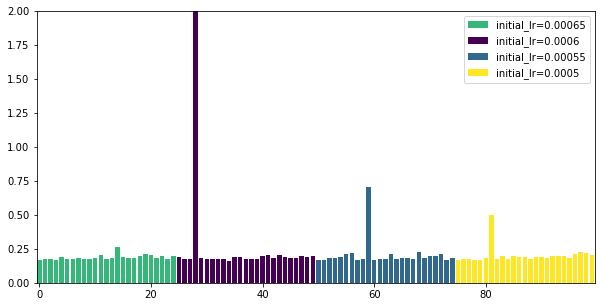

In [20]:
# Plot final epoch loss with respect to initial learning rate
outcome = 'initial_lr'

fig, ax = plt.subplots(1,1, figsize=(10,5))
uniques = list(set(results[outcome])) # get categories
colors = plt.cm.viridis(np.linspace(0, 1, len(uniques)))
for i, value in enumerate(uniques):
    ax.bar(x=results.index[results[outcome]==value], height=results['final_loss'][results[outcome]==value], color=colors[i], label=f'{outcome}={value}')
    
ax.set_xlim(-0.5,99.5)
ax.set_ylim(0,2)

# fix wrong ordering of legend
handles,labels = ax.get_legend_handles_labels()
order = [2,0,1,3]
ax.legend([handles[i] for i in order], [labels[i] for i in order])

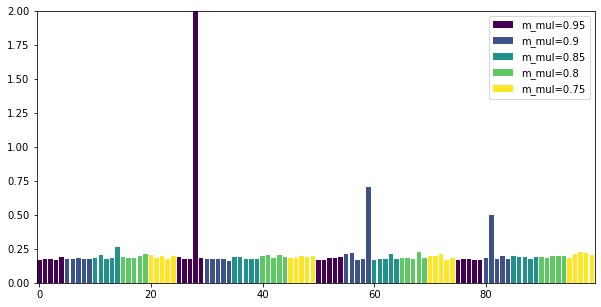

In [21]:
# Plot final epoch loss with respect to decay rate (lower=faster decay)
outcome = 'm_mul'

fig, ax = plt.subplots(1,1, figsize=(10,5))
uniques = list(set(results[outcome])) # get categories
colors = plt.cm.viridis(np.linspace(0, 1, len(uniques)))
for i, value in enumerate(uniques):
    ax.bar(x=results.index[results[outcome]==value], height=results['final_loss'][results[outcome]==value], color=colors[i], label=f'{outcome}={value}')
    
ax.set_xlim(-0.5,99.5)
ax.set_ylim(0,2)
ax.legend()

# Second test with M = 50

In [22]:
# Import data
results = pd.read_csv('hyperparameter_tuning_results_m50', index_col=0)
results

,initial_lr,m_mul,final_loss
0,0.00065,0.8,0.236606
1,0.00065,0.8,0.242102
2,0.00065,0.8,0.227229
3,0.00065,0.8,0.221264
4,0.00065,0.8,0.277865
5,0.00050,0.8,0.226577
6,0.00050,0.8,0.237445
7,0.00050,0.8,0.308270
8,0.00050,0.8,0.252728
9,0.00050,0.8,0.266609


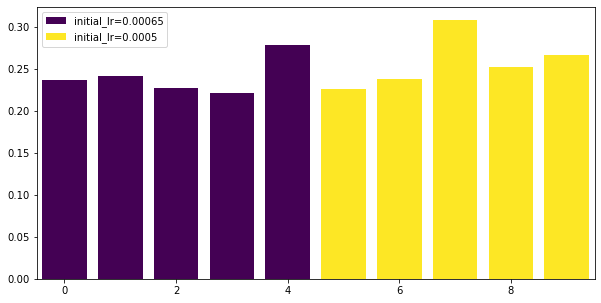

In [23]:
# Plot final epoch loss with respect to initial learning rate
outcome = 'initial_lr'

fig, ax = plt.subplots(1,1, figsize=(10,5))
uniques = list(set(results[outcome])) # get categories
colors = plt.cm.viridis(np.linspace(0, 1, len(uniques)))
for i, value in enumerate(uniques):
    ax.bar(x=results.index[results[outcome]==value], height=results['final_loss'][results[outcome]==value], color=colors[i], label=f'{outcome}={value}')
    
ax.set_xlim(-0.5,9.5)
ax.legend()

In [10]:
np.mean(results['final_loss'][0:4])

0.2318004775

In [11]:
np.mean(results['final_loss'][5:9])

0.2562551375